# Bayesian Optimization & Batch Increasing

In [1]:
import sys
sys.path.append('.')
from methods import FashionMnistDataset, simple_train, increase_batch_size_train
from methods import history_plot_figures, confution_matrix_figure, EPOCHS
from methods import preprocessing_per_train_method_bar_figure
import numpy as np
from pandas import DataFrame as Df
from functools import partial
from bayes_opt import BayesianOptimization

ModuleNotFoundError: No module named 'zca'

In [2]:
hparams = {
    'dropout1': (0.0, 0.2) ,
    'dropout2': (0.2, 0.3),
    'dropout3': (0.3, 0.4),
    'dropout4': (0.25, 0.35),
    'dropout5': (0.15, 0.25),
    'l2_1': (0.0, 0.0002),
    'l2_2': (0.0, 0.0002),
    'l2_3': (0.0, 0.0002),
    'l2_4': (0.0, 0.0002),
    'layers_123_dist': (0.0, 1.0),
    'kernel_size_35_dist':(0.0, 1.0)
    }

In [ ]:
test_accuracy_dict = {}
histrory_dict = {}

In [ ]:
simple_train_hparams = {
    'dropout1': 0.1,
    'dropout2': 0.25,
    'dropout3': None,
    'dropout4': 0.3,
    'dropout5': 0.2,
    'l2_1': 1e-4,
    'l2_2': 1e-4,
    'l2_3': None,
    'l2_4': 1e-4,
    'layers_123_dist': 0.66,
    'kernel_size_35_dist':0.5
}

In [2]:
best_test_acc = 0
best_y_test_pred = None
best_y_test = None

## No Preprocessing


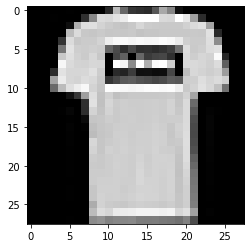

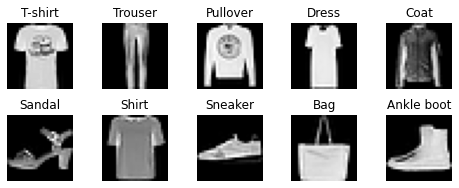

In [3]:
dset = FashionMnistDataset()
dset.plot_data()

### Simple Training

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **simple_train_hparams)
test_accuracy_dict["simple_nopr"] = test_acc
histrory_dict["simple_nopr"] = h
if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Batch increasing method

In [ ]:
test_acc, h, y_test_pred = increase_batch_size_train(dset, EPOCHS, bayes=False, **simple_train_hparams)
test_accuracy_dict["batch_nopr"] = test_acc
histrory_dict["batch_nopr"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Bayes opt

In [ ]:
fit_with_partial = partial(simple_train ,EPOCHS, True)
optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=hparams,
    verbose=2,
    random_state=1
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)
results = optimizer.max["params"]

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **results)
test_accuracy_dict["bayes_nopr"] = test_acc
histrory_dict["bayes_nopr"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Bayes opt + Batch increasing

In [ ]:
fit_with_partial = partial(increase_batch_size_train ,EPOCHS, True)
optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=hparams,
    verbose=2,
    random_state=1,
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)
results = optimizer.max["params"]

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **results)
test_accuracy_dict["bayes_batch_nopr"] = test_acc
histrory_dict["bayes_batch_nopr"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

## Standard division normalization

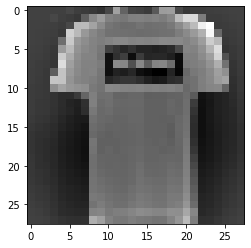

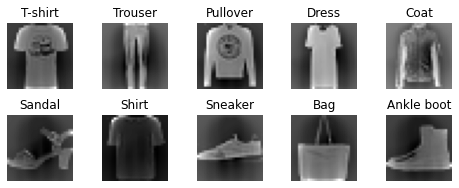

In [4]:
dset = FashionMnistDataset("std_normal")
dset.plot_data()

### Simple Training

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **simple_train_hparams)
test_accuracy_dict["simple_std"] = test_acc
histrory_dict["simple_std"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Batch increasing method

In [ ]:
test_acc, h, y_test_pred = increase_batch_size_train(dset, EPOCHS, bayes=False, **simple_train_hparams)
test_accuracy_dict["batch_std"] = test_acc
histrory_dict["batch_std"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Bayes opt

In [ ]:
fit_with_partial = partial(simple_train ,EPOCHS, True)
optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=hparams,
    verbose=2,
    random_state=1
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)
results = optimizer.max["params"]

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **results)
test_accuracy_dict["bayes_batch_std"] = test_acc
histrory_dict["bayes_batch_std"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Bayes opt + Batch increasing

In [ ]:
fit_with_partial = partial(increase_batch_size_train ,EPOCHS, True)
optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=hparams,
    verbose=2,
    random_state=1
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)
results = optimizer.max["params"]

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **results)
test_accuracy_dict["bayes_batch_std"] = test_acc
histrory_dict["bayes_batch_std"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

## ZCA whitening

### Simple Training

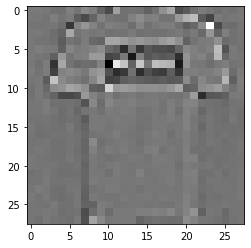

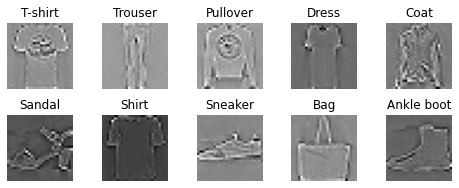

In [5]:
dset = FashionMnistDataset("zca_whiting")
dset.plot_data()

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **simple_train_hparams)
test_accuracy_dict["simple_zca"] = test_acc
histrory_dict["simple_zca"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Batch increasing method

In [ ]:
test_acc, h, y_test_pred = increase_batch_size_train(dset, EPOCHS, bayes=False, **simple_train_hparams)
test_accuracy_dict["batch_zca"] = test_acc
histrory_dict["batch_zca"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Bayes opt

In [ ]:
fit_with_partial = partial(simple_train ,EPOCHS, True)
optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=hparams,
    verbose=2,
    random_state=1
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)
results = optimizer.max["params"]

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **results)
test_accuracy_dict["bayes_batch_zca"] = test_acc
histrory_dict["bayes_batch_zca"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Bayes opt + Batch increasing

In [ ]:
fit_with_partial = partial(increase_batch_size_train ,EPOCHS, True)
optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=hparams,
    verbose=2,
    random_state=1
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)
results = optimizer.max["params"]

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **results)
test_accuracy_dict["bayes_batch_zca"] = test_acc
histrory_dict["bayes_batch_zca"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

## Histogram Equalization

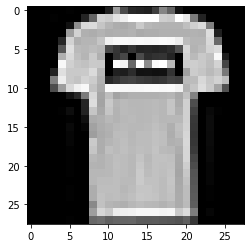

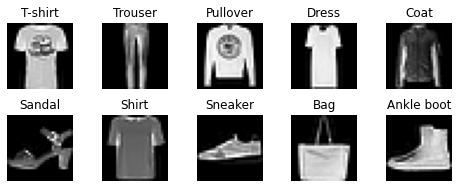

In [6]:
dset = FashionMnistDataset("eq_hist")
dset.plot_data()

### Simple Training

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **simple_train_hparams)
test_accuracy_dict["simple_eq_hist"] = test_acc
histrory_dict["simple_eq_hist"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Batch increasing method

In [ ]:
test_acc, h, y_test_pred = increase_batch_size_train(dset, EPOCHS, bayes=False, **simple_train_hparams)
test_accuracy_dict["batch_eq_hist"] = test_acc
histrory_dict["batch_eq_hist"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Bayes opt

In [ ]:
fit_with_partial = partial(simple_train ,EPOCHS, True)
optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=hparams,
    verbose=2,
    random_state=1
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)
results = optimizer.max["params"]

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **results)
test_accuracy_dict["bayes_batch_eq_hist"] = test_acc
histrory_dict["bayes_batch_eq_hist"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

### Bayes opt + Batch increasing

In [ ]:
fit_with_partial = partial(increase_batch_size_train ,EPOCHS, True)
optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=hparams,
    verbose=2,
    random_state=1
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)
results = optimizer.max["params"]

In [ ]:
test_acc, h, y_test_pred = simple_train(dset, EPOCHS, bayes=False, **results)
test_accuracy_dict["bayes_batch_eq_hist"] = test_acc
histrory_dict["bayes_batch_eq_hist"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

## Results

### Plot bar chart per pre-processing, group by train method

In [ ]:
test_accs = np.array(list(test_accuracy_dict.values())).reshape(4,4)

In [ ]:
test_accs_df = Df(test_accs,
        index=["No Pr", "STD", "ZCA", "HE"],
        columns=["simple model", "batch", "bayes", "bayes+batch"]
        )

In [ ]:
preprocessing_per_train_method_bar_figure(test_accs_df)

### Plot Loss/Score Curves

In [ ]:
history_plot_figures(histrory_dict)

### Confusion matrix for the best model

In [ ]:
confution_matrix_figure(best_y_test_pred, best_y_test, dset.set)